통계적 사고 (2판) 연습문제 ([thinkstats2.com](thinkstats2.com), [think-stat.xwmooc.org](http://think-stat.xwmooc.org))<br>
Allen Downey / 이광춘(xwMOOC)

In [3]:
%matplotlib inline
from __future__ import print_function

import thinkstats2
import thinkplot

import math
import random
import numpy as np

from scipy import stats
from estimation import RMSE, MeanError

## 연습문제 8.1

이번 장에서, $\mu$를 추정하는데 xbar 와 중위수를 사용했고, xbar가 MSE 하한을 산출함을 알아냈다. 또한, $\sigma$를 추정하는데  $S^2$ 와  $S_{n-1}^2$ 을 사용했고,  $S^2$ 은 편향되었고, $S_{n-1}^2$은 불편향임을 알아냈다.
유사한 실험을 실행해서, xbar와 중위수가 $\mu$의 편향된 추정값임을 알아내라. 또한, $S^2$ 혹은 $S_{n-1}^2$ 가 MSE 하한을 산출하는지 검사하라.

In [3]:
"""Mean error for xbar and median as estimators of population mean.

    n: sample size
    m: number of iterations
"""
n = 7
m=100000

mu = 0
sigma = 1

means = []
medians = []
for _ in range(m):
    xs = [random.gauss(mu, sigma) for i in range(n)]
    xbar = np.mean(xs)
    median = np.median(xs)
    means.append(xbar)
    medians.append(median)

print('Experiment 1')
print('mean error xbar', MeanError(means, mu))
print('mean error median', MeanError(medians, mu))

"""RMSE for biased and unbiased estimators of population variance.

n: sample size
m: number of iterations
"""
mu = 0
sigma = 1

estimates1 = []
estimates2 = []
for _ in range(m):
    xs = [random.gauss(mu, sigma) for i in range(n)]
    biased = np.var(xs)
    unbiased = np.var(xs, ddof=1)
    estimates1.append(biased)
    estimates2.append(unbiased)

print('Experiment 2')
print('RMSE biased', RMSE(estimates1, sigma**2))
print('RMSE unbiased', RMSE(estimates2, sigma**2))

Experiment 1
mean error xbar -0.000501853563251
mean error median -5.92353811989e-05
Experiment 2
RMSE biased 0.515294279494
RMSE unbiased 0.577482542019


1. xbar 와 중위수가 m이 증가함에따라 더 낮은 평균오차를 산출한다. 실험으로부터 식별할 수 있는한 어떤 것도 분명히 편향되지 않았다.
1. 분산에 대한 불편 추정량이 불편 추정량보다 더 낮은 약 10% 낮은 RMSE를 산출한다. 그리고 m이 증가함에 따라 차이는 유지된다.

## 연습문제 8.2  
모수 $\lambda=2$를 갖는 지수분포에서 표본 $n=10$개를 추출한다고 가정하자. 실험을 1000번 모의시험하고 추정값 lamhat의 표본 분포를 도식화한다. 추정값의 표준오차와 90% 신뢰구간을 계산하라.

다른 $n$ 값을 갖는 실험을 반복하고, $n$ 값과 표준오차를 도식화한다.

standard error 0.784058129255
confidence interval (1.2783641952567839, 3.5793120939847975)


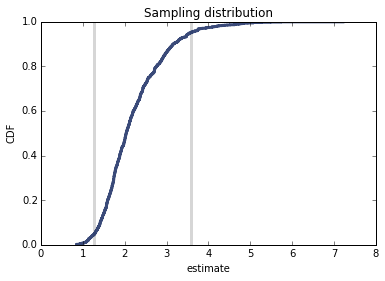

In [5]:
"""Sampling distribution of L as an estimator of exponential parameter.

lam: parameter of an exponential distribution
n: sample size
m: number of iterations
"""
lam=2
n=10
m=1000

def VertLine(x, y=1):
    thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

estimates = []
for j in range(m):
    xs = np.random.exponential(1.0/lam, n)
    lamhat = 1.0 / np.mean(xs)
    estimates.append(lamhat)

stderr = RMSE(estimates, lam)
print('standard error', stderr)

cdf = thinkstats2.Cdf(estimates)
ci = cdf.Percentile(5), cdf.Percentile(95)
print('confidence interval', ci)
VertLine(ci[0])
VertLine(ci[1])

# plot the CDF
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='estimate',
               ylabel='CDF',
               title='Sampling distribution')

1. 표본크기 10인경우
    - 표준오차 : 0.896717911545
    - 신뢰구간: (1.2901330772324622, 3.8692334892427911)
1. 표본크기가 증가함에 따라, 표준오차와 CI 구간범위가 줄어든다:
    - 10      0.90    (1.3, 3.9)
    - 100     0.21    (1.7, 2.4)
    - 1000    0.06    (1.9, 2.1)
상기 신뢰구간 세개 모두 실제 값 2를 포함하고 있다.

## 연습문제 8.3  
하키와 축구같은 스포츠 게임에서 득점 사이 시간은 대체로 지수를 따른다. 그래서 게임에서 한 팀이 득점한 골을 관측함으로써 득점을 추정할 수 있다. 이 추정 과정은 득점 사이 시간을 표집하는 것과 약간 다르다. 그래서 작동방법을 살펴보다.

게임당 골로 득점률 ${\tt lam}$을 인자로 받고, 전체 시간이 1 게임 경과할 때까지 득점사이 시간을 생성함으로서 게임을 모의시험하고 나서, 득점한 점수를 반환하는 함수를 작성하라.

많은 게임을 모의시험하고, ${\tt lam}$ 추정값을 저장하고 나서 평균 오차와 RMSE를 계산하는 또다른 함수를 작성하라.

추정값을 이와 같은 방식으로 만드는 것이 편향됐을까? 추정값에 대한 표본분포와 90% 신뢰구간을 도식화하시오. 표준오차는 얼마인가? ${\tt lam}$ 값을 크게하면, 표집오차에 무슨일이 생길까?

Experiment 4
rmse L 1.41495194265
mean error L -0.000607


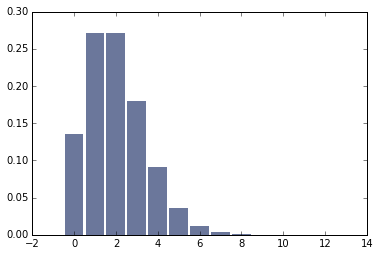

In [4]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

def Estimate4(lam=2, m=1000000):

    estimates = []
    for i in range(m):
        L = SimulateGame(lam)
        estimates.append(L)

    print('Experiment 4')
    print('rmse L', RMSE(estimates, lam))
    print('mean error L', MeanError(estimates, lam))
    
    pmf = thinkstats2.Pmf(estimates)

    thinkplot.Hist(pmf)
    thinkplot.Show()

Estimate4()    

1. 이런 방식으로 lambda 추정에 대한 RMSE는 1.4.
1. 평균오차는 작고, m이 커짐에 따라 줄어든다. 그래서, 추정량은 편향되지 않은 것으로 보인다.
주의: 득점 사이 시간이 지수분포라면, 게임에서 득점된 골의 분포는 포아송이다. [https://en.wikipedia.org/wiki/Poisson_distribution](https://en.wikipedia.org/wiki/Poisson_distribution) 참조한다.